In [477]:
import pandas as pd
import altair as alt
import datapane as dp


In [583]:
import sys

sys.path.insert(0,r'C:/Users/joao.ramalho/Repositorio-jv/tasks/')

import datapane as dp

import pandas as pd
import psycopg2
import config
import workdays
import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib.ticker import FuncFormatter
holidays_br = workdays.load_holidays('BR')
holidays_b3 = workdays.load_holidays('B3')
from plotly_resampler import FigureResampler, EveryNthPoint, EfficientLTTB
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functools import reduce
import numpy as np

from utils import bbg_api

In [584]:
db_conn_k11 = psycopg2.connect(host=config.DB_K11_HOST, dbname=config.DB_K11_NAME , user=config.DB_K11_USER, password=config.DB_K11_PASS)
query=f"SELECT ticker, spread_bps, spread_localccy, spread_usd, data_hora FROM public.adr_spread  where data_hora >'2022-06-01'"


df =pd.read_sql(query,db_conn_k11)
db_conn_k11.close()
df=df.drop_duplicates()
tickers = dict()

df['date'] =df['data_hora'].apply(lambda x: x.date())
week = df[df['date']>workdays.workday(datetime.date.today(), -3, holidays_b3)]
spread_analysis = week.groupby(by='ticker').agg({'spread_bps':np.mean}).sort_values('spread_bps')

In [585]:
papeis = df['ticker'].unique()

In [586]:
for i,t in enumerate(papeis):
    tickers.__setitem__(f"{t}",df[df['ticker']==f"{t}"].sort_values(by='data_hora',ascending=True).rename(columns={'spread_bps':f"{t}"}))
    tickers[t]['data_hora'] = tickers[t]['data_hora'].astype(str)
    tickers[t]=tickers[t][['data_hora',f"{t}"]].set_index('data_hora')
    tickers[t] = tickers[t][np.abs(tickers[t][t]-tickers[t][t].mean()) <= (3*tickers[t][t].std())].sort_values('data_hora').dropna()
    tickers[t] = tickers[t][np.abs(tickers[t][t]-tickers[t][t].mean()) <= (3*tickers[t][t].std())].sort_values('data_hora').dropna()
    tickers[t][f"{t}_mma"]=tickers[t][t].rolling(200).mean()
    mininimo = tickers[t][f"{t}_mma"].min()
    maximo = tickers[t][f"{t}_mma"].max()
    if i==0:
              
        complete=tickers[t][[f"{t}_mma"]]
    else:
        complete = complete.merge(tickers[t][[f"{t}_mma"]],on='data_hora',how='left')

In [587]:
spread_analysis

,spread_bps
ticker,
CIEL3,-520.695504
BBDC3,-144.118057
GOLL4,-138.054596
ABEV3,-135.673691
PCAR3,-133.566555
BBSE3,-84.091188
BRFS3,-76.392411
ITUB4,-55.460536
SBSP3,-52.424535


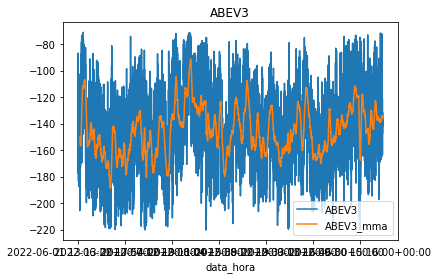

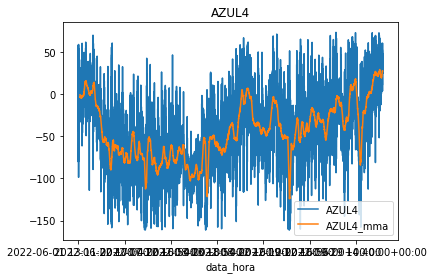

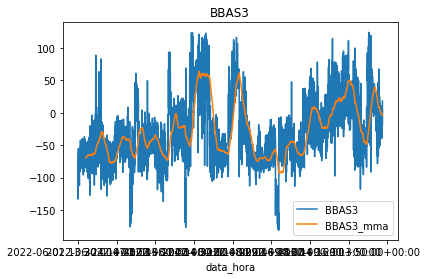

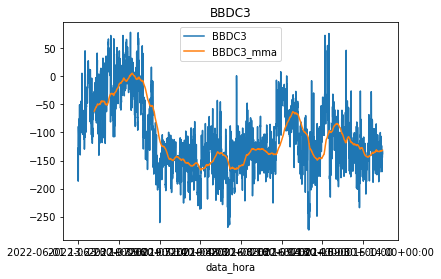

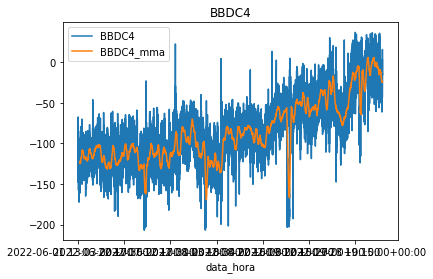

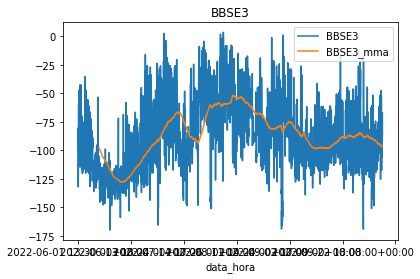

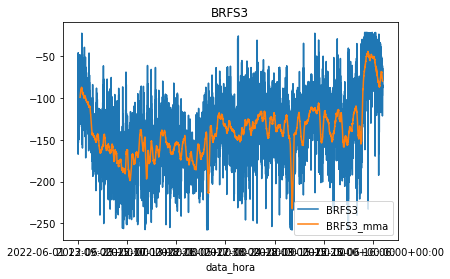

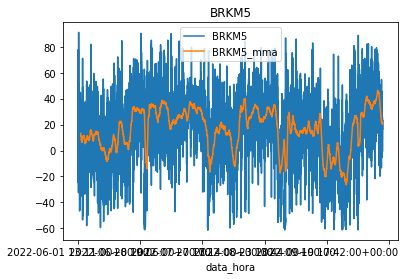

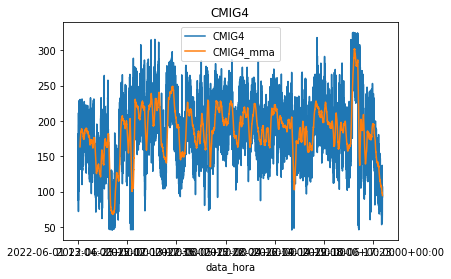

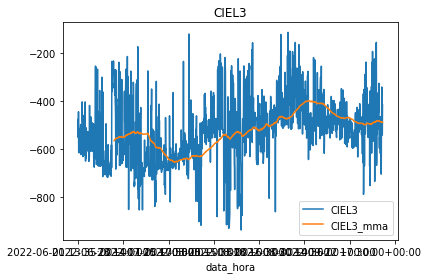

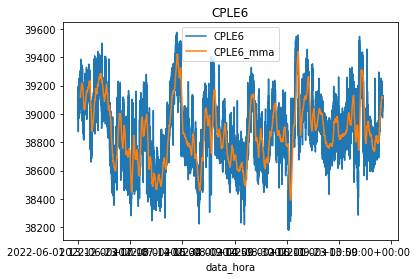

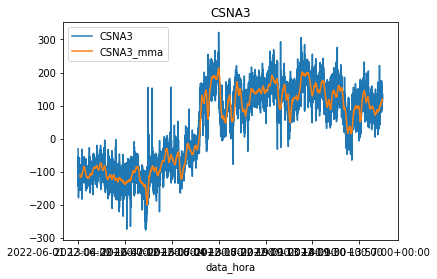

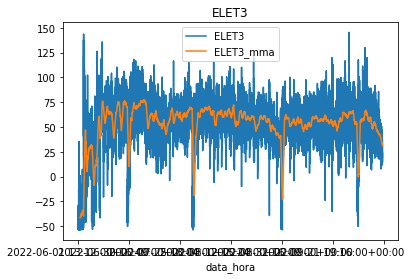

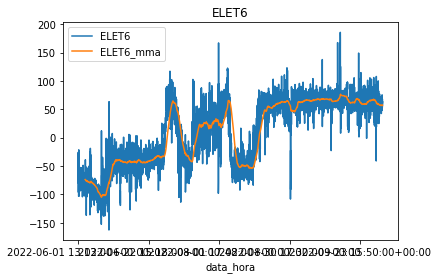

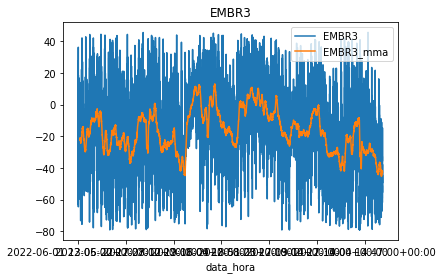

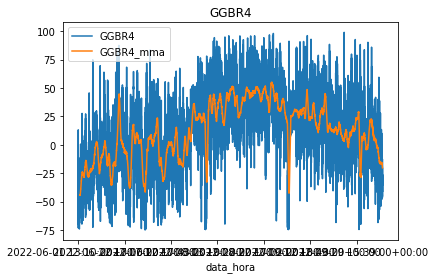

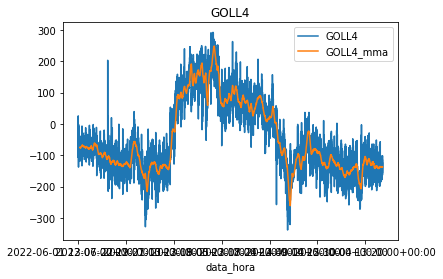

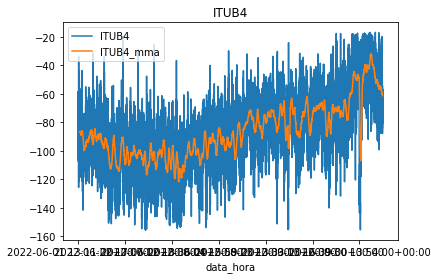

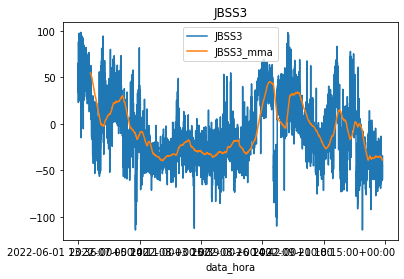

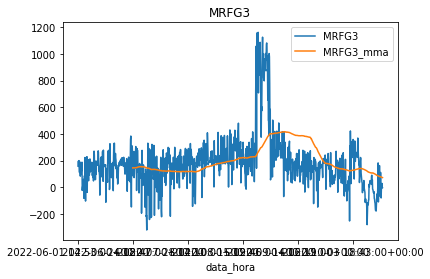

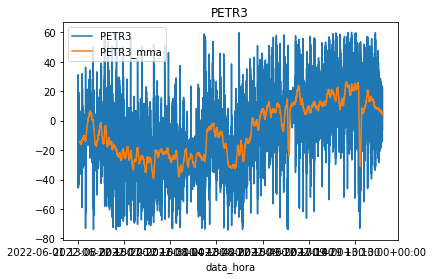

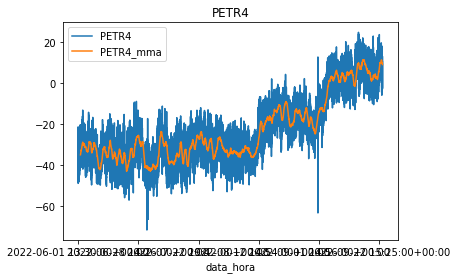

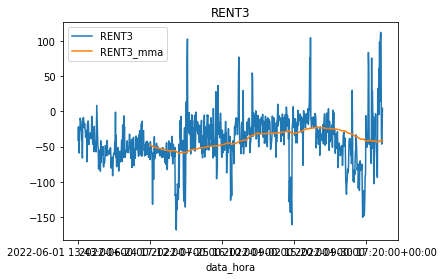

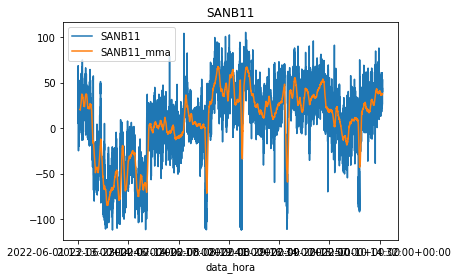

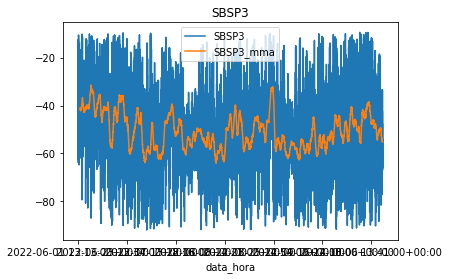

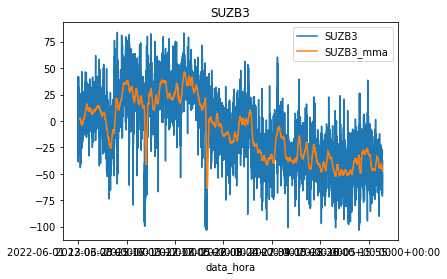

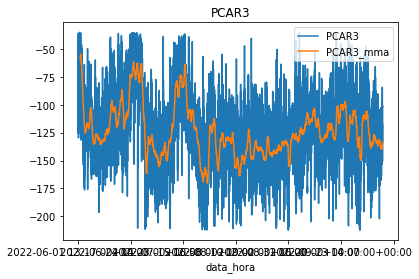

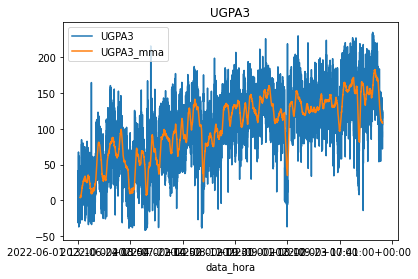

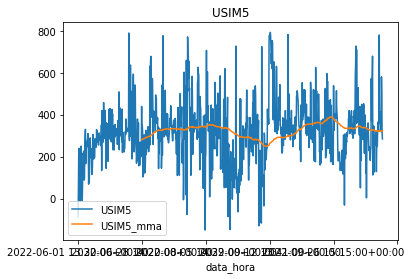

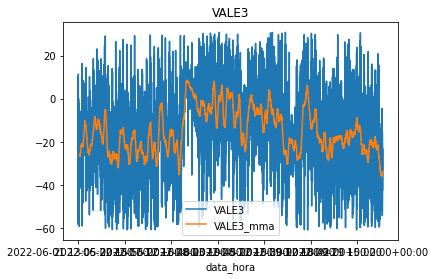

In [588]:
plot_list = [
    dp.Plot(
    tickers[t].plot(kind='line',title=f"{t}"),label = t
    )
    for t in papeis
    
]

In [589]:
# embed into a Datapane Report
report = dp.Report(
    dp.Page(title="ADR", blocks=["### Adr_local",     dp.Group(dp.DataTable(spread_analysis, caption="Média do spread nos últimos 3 dias"),
            dp.Select(blocks=plot_list),columns=2)]),
#      blocks=[spread_analysis.style.background_gradient(cmap="viridis")]
    dp.Page(title="Titanic Plot", blocks=["### Plot"])
    
)
report.save("K11_DeltaOne_20221011.html")

Report saved to ./K11_DeltaOne_20221011.html

In [9]:
db

NameError: name 'db' is not defined

In [ ]:
import pandas as pd

In [ ]:
file = 

In [ ]:
from pathlib import Path
import pandas as pd

filename = r'C:\Users\joao.ramalho\Downloads\KAPITALO BOVESPA.xlsx'  # r'...' => raw string
filename = Path(filename)

with open(filename, 'rb') as handle:  # rb => read binary
    df = pd.read_excel(handle)


In [ ]:
df.columns = df.iloc[df[df['COMPRA']=='CONSOLIDADO CLIENTE/ATIVO'].index.tolist()[0]+1]


In [ ]:
df

In [ ]:
df = df[['Ativo','Saldo','Preço Médio Saldo']]

In [ ]:
df = pd.read_excel(r'C:\Users\joao.ramalho\Downloads\KAPITALO CTA MAE 900279 20221003-1848.xlsx')

In [ ]:
df.columns = df.iloc[2]

In [ ]:
df = df.iloc[3:]
df.columns.values[14]='Modalidade'

In [ ]:

parse_fundos = {
    'KAPITALO KAPPA':'KAPITALO KAPPA MASTER FIM',
    'KAPITALO K10 PREV MASTER':'KAPITALO K10 PREV MASTER FIM',
    'KAPITALO KAPPA PREV': 'KAPITALO KAPPA PREV MASTER FIM'

}


In [ ]:
df = df[['Investidor','Ativo','Lado','Qtd','Tx','Vencimento','Modalidade']]

In [ ]:
df['Investidor'] = df['Investidor'].map(parse_fundos)

In [ ]:
df.columns = ["str_fundo","str_papel","str_tipo" ,"dbl_quantidade","dbl_taxa","dte_datavencimento",'Modalidade']

In [ ]:
    df.fillna(0, inplace=True)
    df = df[df["str_papel"] != 0]


    df["str_corretora"] = "XP"
    df["str_tipo_registro"] = df["Modalidade"].apply(
        lambda x: "R" if x == "Balcão" else "N" 
    )
    df["str_modalidade"] = df["str_tipo_registro"].apply(
        lambda x: "E1" if x == "N" else None
    )
    df["str_tipo_comissao"] = "A"
    df["dbl_valor_fixo_comissao"] = 0
    df["str_reversivel"] = "TD"
    
    df["str_status"] = "Emprestimo"
    df["dbl_quantidade"] = df.apply(lambda row: abs(row['dbl_quantidade']) if row['str_tipo']=='T' else -abs(row['dbl_quantidade']),axis=1)

In [ ]:
df["dte_databoleta"] = datetime.date.today().strftime("%Y-%m-%d")
df["dte_data"] = datetime.date.today().strftime("%Y-%m-%d")

In [ ]:
 df[[
     
     
            "str_fundo",
            "str_corretora",
            "str_tipo",
            "dte_datavencimento",
            "dbl_taxa",
            "str_reversivel",
            "str_tipo_registro",
            "str_modalidade",
            "str_tipo_comissao",
            "dbl_valor_fixo_comissao",
            "str_papel",
            "dbl_quantidade",                  
    ]].to_clipboard(excel=True)


In [ ]:
import os
import time

In [ ]:
a = datetime.datetime.fromtimestamp(os.path.getmtime(r'C:\Users\joao.ramalho\Downloads\KAPITALO CTA MAE 900279 20221003-1848.xlsx'))

In [59]:
df = pd.read_excel(r'G:\Trading\K11\ADR\Trades\KAPITALO BMF 03.10.2022 (ADR x LOCAL).xlsx')

In [60]:
df

,COMPRA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,VENDA,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Ativo,Série,Qtd,Preço,Preço Base,DMA/BI,Mandatário,Operador Final,After?,NaN,Ativo,Série,Qtd,Preço,Preço Base,DMA/BI,Mandatário,Operador Final,After?
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDOX22,X22,1,5212,NaN,BI,RAFAEL PAIVA POPPE DO VALLE,INR,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDOX22,X22,1,5215,NaN,BI,RAFAEL PAIVA POPPE DO VALLE,INR,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CONSOLIDADO CLIENTE/ATIVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nome,Ativo,Qtd. Comprada,Preço Médio (Compra),Qtd. Vendida,Preço Médio (Venda),Saldo,Preço Médio Saldo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,KAPITALO INVESTIMENTOS LTDA,WDOX22,0,NaN,-2,5213.5,-2,5213.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_compra = df[['COMPRA','Unnamed: 1','Unnamed: 2','Unnamed: 3']]
df_compra.columns = ['ticker','SERIE','QUANTIDADE','PRECO']
df_compra = df_compra.iloc[2:]
df_compra = df_compra.dropna()
df_compra = df_compra[df_compra['ticker']!='Nome']


,ticker,SERIE,QUANTIDADE,PRECO


In [65]:
df_venda = df[['VENDA','Unnamed: 11','Unnamed: 12','Unnamed: 13',]]
df_venda.columns = ['ticker','SERIE','QUANTIDADE','PRECO']
df_venda = df_venda.iloc[1:]
df_venda = df_venda.dropna()
df_venda['QUANTIDADE'] = (-1)*abs(df_venda['QUANTIDADE'].astype(int))
df_venda

,ticker,SERIE,QUANTIDADE,PRECO
1,WDOX22,X22,-1,5212
2,WDOX22,X22,-1,5215


In [69]:
df = pd.concat([df_venda,df_compra])

In [70]:
df

,ticker,SERIE,QUANTIDADE,PRECO
1,WDOX22,X22,-1,5212
2,WDOX22,X22,-1,5215


In [72]:

df["MESA"] = "Kapitalo 11.1"
df["TIPO"] = "Futuro"
df["CONTRA"] = "Liquidez"
df['ESTRATEGIA'] = 'Arbitragem Aluguel'
df['CLEARING'] = 'Bradesco'

df

,ticker,SERIE,QUANTIDADE,PRECO,MESA,TIPO,CONTRA,ESTRATEGIA,CLEARING
1,WDOX22,X22,-1,5212,Kapitalo 11.1,Futuro,Liquidez,Arbitragem Aluguel,Bradesco
2,WDOX22,X22,-1,5215,Kapitalo 11.1,Futuro,Liquidez,Arbitragem Aluguel,Bradesco


In [75]:
df["CODIGO"] = df['ticker'].apply(lambda x: str(x[0:3]))

In [174]:
import pandas as pd
import psycopg2
import config
import workdays
import datetime



holidays_br = workdays.load_holidays('BR')
holidays_b3 = workdays.load_holidays('B3')

dt = datetime.date.today()
vcto_0 = dt.strftime('%d/%m/%Y')

dt_pos = workdays.workday(dt, -1, holidays_br)
dt_1 = workdays.workday(datetime.date.today(), -1, holidays_b3)
dt_2 = workdays.workday(dt, -2, holidays_b3)
dt_3 = workdays.workday(dt, -3, holidays_b3)


In [513]:
def prop_zerada(dt,estrategia,mercado,codigo,serie):
    
    lotes = {
        'WDO':1,
        'WIN':1,
        'IND':5,
        'DOL':5,
    }
    
    
    prop = dict()   
    query = f"select str_fundo,str_codigo,str_serie, dbl_lote from tbl_carteira1 where dte_data ='{dt.strftime('%Y-%m-%d')}' and str_estrategia = '{estrategia}'and str_mercado='{mercado}' and str_mesa = 'Kapitalo 11.1' and str_serie = '{serie}' "
    
    db_conn_test = psycopg2.connect(
        host="PGKPTL01", dbname="db_Teste", user="kapitalo11", password="kapitalo11"
    )
    df = pd.read_sql(query,db_conn_test)
    if codigo in ['WDO','DOL','IND','WIN']:
        for i,row in df.iterrows():
                df.loc[i,'dbl_lote'] = row['dbl_lote']*lotes[row['str_codigo']]
    df = df.groupby(['str_fundo','str_serie']).sum().reset_index()
    
    df['prop'] = df['dbl_lote']/sum(df['dbl_lote'])
    
    
    prop[serie] =df[['str_fundo','prop']].set_index('str_fundo')['prop'].to_dict()
    
    return prop

In [549]:
df = pd.read_excel(r'G:\Trading\K11\ADR\Trades\KAPITALO RECAP BOX.xlsx')
df.columns = ['zero','ticker','lote','médio']
df = df.drop(columns=['zero'])
df=df.fillna(0)

In [550]:
df['side'] = df['ticker'].apply(lambda x: str(x)[-3:].replace("(","").replace(")",""))
df['ticker'] = df['ticker'].apply(lambda x: str(x)[:len(str(x))-4])

In [551]:
df

,ticker,lote,médio,side
0,VALEK811,4600.0,3.610870,S
1,VALEW811,4600.0,3.962609,B
2,VALE3,4600.0,76.453043,B
3,,0.0,0.000000,0
4,VALEK806,3500.0,3.919429,S
5,VALEW806,3500.0,3.645714,B
6,VALE3,3500.0,76.582000,B
7,,0.0,0.000000,0
8,VALEK768,300.0,4.170000,S
9,VALEW768,300.0,3.440000,B


In [552]:
db_conn_risk = psycopg2.connect(
    host=config.DB_RISK_HOST,
    dbname=config.DB_RISK_NAME,
    user=config.DB_RISK_USER,
    password=config.DB_RISK_PASS,
)


In [553]:
def get_options_fields(ticker,dte_ref=None):
    if dte_ref == None:
        dte_ref = workdays.workday(datetime.date.today(), -1, holidays_b3)
        
    db_conn_risk = psycopg2.connect(
    host=config.DB_RISK_HOST,
    dbname=config.DB_RISK_NAME,
    user=config.DB_RISK_USER,
    password=config.DB_RISK_PASS,
    )

    query = f" SELECT tckrsymb as ticker,undrlyginstrmid as under ,asst as CODIGO,exrcpric as strike ,optntp as tipo,optnstyle as style, tradgenddt as vencimento FROM b3up2data.equities_optiononequitiesinstrumentfile where rptdt='{dte_ref.strftime('%Y-%m-%d')}' and tckrsymb in {ticker}"
    df = pd.read_sql(query,db_conn_risk)
    db_conn_risk.close()
    return df

In [422]:
# def build_opt_bbg_ticker(ticker, under,vencimento,tipo,strike):
#     print(ticker, under,vencimento,tipo,strike)
#     if under != 0:
#         opt_ticker = under + " BZ " + vencimento.strftime('%m/%d/%Y')+" "+str(tipo)[0]+str(strike)
#     else:
#         opt_ticker = ticker
#     return opt_ticker
    

In [554]:
opt = get_options_fields(tuple([row['ticker'] for i,row in df.iterrows()]))

In [555]:
opt

,ticker,under,codigo,strike,tipo,style,vencimento
0,VALEK768,VALE3,VALE,76.84,Call,EURO,2022-11-18
1,VALEK806,VALE3,VALE,77.34,Call,AMER,2022-11-18
2,VALEK811,VALE3,VALE,77.84,Call,EURO,2022-11-18
3,VALEW768,VALE3,VALE,76.84,Put,EURO,2022-11-18
4,VALEW806,VALE3,VALE,77.34,Put,EURO,2022-11-18
5,VALEW811,VALE3,VALE,77.84,Put,EURO,2022-11-18


In [556]:
df = df.merge(opt,on='ticker',how='left')

In [557]:
df=df.fillna(0)

In [558]:
df = df[df['lote']!=0]

In [559]:
df

,ticker,lote,médio,side,under,codigo,strike,tipo,style,vencimento
0,VALEK811,4600.0,3.610870,S,VALE3,VALE,77.84,Call,EURO,2022-11-18
1,VALEW811,4600.0,3.962609,B,VALE3,VALE,77.84,Put,EURO,2022-11-18
2,VALE3,4600.0,76.453043,B,0,0,0.00,0,0,0
4,VALEK806,3500.0,3.919429,S,VALE3,VALE,77.34,Call,AMER,2022-11-18
5,VALEW806,3500.0,3.645714,B,VALE3,VALE,77.34,Put,EURO,2022-11-18
6,VALE3,3500.0,76.582000,B,0,0,0.00,0,0,0
8,VALEK768,300.0,4.170000,S,VALE3,VALE,76.84,Call,EURO,2022-11-18
9,VALEW768,300.0,3.440000,B,VALE3,VALE,76.84,Put,EURO,2022-11-18
10,VALE3,300.0,76.540000,B,0,0,0.00,0,0,0


In [560]:
df['du'] = df.apply(lambda row:  workdays.networkdays(datetime.date.today(),row['vencimento'], holidays=holidays_br) if type(row['vencimento']) == datetime.date else 0,axis=1)

In [561]:
df


,ticker,lote,médio,side,under,codigo,strike,tipo,style,vencimento,du
0,VALEK811,4600.0,3.610870,S,VALE3,VALE,77.84,Call,EURO,2022-11-18,25
1,VALEW811,4600.0,3.962609,B,VALE3,VALE,77.84,Put,EURO,2022-11-18,25
2,VALE3,4600.0,76.453043,B,0,0,0.00,0,0,0,0
4,VALEK806,3500.0,3.919429,S,VALE3,VALE,77.34,Call,AMER,2022-11-18,25
5,VALEW806,3500.0,3.645714,B,VALE3,VALE,77.34,Put,EURO,2022-11-18,25
6,VALE3,3500.0,76.582000,B,0,0,0.00,0,0,0,0
8,VALEK768,300.0,4.170000,S,VALE3,VALE,76.84,Call,EURO,2022-11-18,25
9,VALEW768,300.0,3.440000,B,VALE3,VALE,76.84,Put,EURO,2022-11-18,25
10,VALE3,300.0,76.540000,B,0,0,0.00,0,0,0,0


In [526]:
df['médio'] = df.apply(lambda row: -row['médio'] if row['side']=='S' else row['médio'] ,axis=1)

In [527]:
from utils import curves

In [562]:
curve = curves.di1_curve()

field         index  PX_LAST    VOLUME
0      ODF23 Comdty   13.678   12140.0
1      ODF24 Comdty   12.770  160375.0
2      ODF25 Comdty   11.580  159010.0
3      ODF26 Comdty   11.425   35590.0
4      ODF27 Comdty   11.420   47005.0
5      ODF28 Comdty   11.470    1245.0
6      ODF29 Comdty   11.570   12460.0
7      ODF30 Comdty   11.610      20.0
8      ODF31 Comdty   11.650    3355.0
9      ODF32 Comdty   11.650      40.0
10     ODF33 Comdty   11.670    1650.0
11     ODF34 Comdty   11.619       0.0
12     ODF35 Comdty   11.623       0.0
13     ODF36 Comdty   11.620     700.0
14     ODF37 Comdty   11.620       0.0
15     ODG23 Comdty   13.685     320.0
16     ODH23 Comdty   13.665    2525.0
17     ODJ23 Comdty   13.680    8485.0
18     ODJ24 Comdty   12.405   14240.0
19     ODJ25 Comdty   11.475    2720.0
20     ODJ26 Comdty   11.349     120.0
21     ODJ27 Comdty   11.342       5.0
22     ODK23 Comdty   13.675     600.0
23     ODM23 Comdty   13.585      75.0
24     ODN23 Comdty   13.

In [563]:
curve

,taxa,fator
du,,
1,0.136780,1.000509
2,0.136780,1.001018
3,0.136780,1.001527
4,0.136780,1.002037
5,0.136780,1.002547
...,...,...
3315,0.116203,4.246704
3316,0.116203,4.248523
3317,0.116202,4.250343


In [564]:
df['fct'] = df['du'].apply(lambda x: curve.iloc[x]['fator'])

In [568]:
df = df.reset_index(drop=True)

In [569]:
df

,ticker,lote,médio,side,under,codigo,strike,tipo,style,vencimento,du,fct
0,VALEK811,4600.0,3.610870,S,VALE3,VALE,77.84,Call,EURO,2022-11-18,25,1.013315
1,VALEW811,4600.0,3.962609,B,VALE3,VALE,77.84,Put,EURO,2022-11-18,25,1.013315
2,VALE3,4600.0,76.453043,B,0,0,0.00,0,0,0,0,1.000509
3,VALEK806,3500.0,3.919429,S,VALE3,VALE,77.34,Call,AMER,2022-11-18,25,1.013315
4,VALEW806,3500.0,3.645714,B,VALE3,VALE,77.34,Put,EURO,2022-11-18,25,1.013315
5,VALE3,3500.0,76.582000,B,0,0,0.00,0,0,0,0,1.000509
6,VALEK768,300.0,4.170000,S,VALE3,VALE,76.84,Call,EURO,2022-11-18,25,1.013315
7,VALEW768,300.0,3.440000,B,VALE3,VALE,76.84,Put,EURO,2022-11-18,25,1.013315
8,VALE3,300.0,76.540000,B,0,0,0.00,0,0,0,0,1.000509


In [581]:
cap=3
ref = 1
for i, row in df.iterrows(): 
    if i < cap:
        df.loc[i,'ord'] = "synt "+ str(ref)
    else:
        df.loc[i,'ord'] = "synt "+ str(ref+1)
        cap+=3
        ref+=1

        

In [582]:
df

,ticker,lote,médio,side,under,codigo,strike,tipo,style,vencimento,du,fct,ord
0,VALEK811,4600.0,3.610870,S,VALE3,VALE,77.84,Call,EURO,2022-11-18,25,1.013315,synt 1
1,VALEW811,4600.0,3.962609,B,VALE3,VALE,77.84,Put,EURO,2022-11-18,25,1.013315,synt 1
2,VALE3,4600.0,76.453043,B,0,0,0.00,0,0,0,0,1.000509,synt 1
3,VALEK806,3500.0,3.919429,S,VALE3,VALE,77.34,Call,AMER,2022-11-18,25,1.013315,synt 2
4,VALEW806,3500.0,3.645714,B,VALE3,VALE,77.34,Put,EURO,2022-11-18,25,1.013315,synt 2
5,VALE3,3500.0,76.582000,B,0,0,0.00,0,0,0,0,1.000509,synt 2
6,VALEK768,300.0,4.170000,S,VALE3,VALE,76.84,Call,EURO,2022-11-18,25,1.013315,synt 3
7,VALEW768,300.0,3.440000,B,VALE3,VALE,76.84,Put,EURO,2022-11-18,25,1.013315,synt 3
8,VALE3,300.0,76.540000,B,0,0,0.00,0,0,0,0,1.000509,synt 3


In [533]:
df_s = dict()
top =3
down =0 
df = df.fillna(0)
for i in range(int(len(df)/3)):
    
#     df.iloc[down:top,'order'] = "synt " + str(i)
    print(df.iloc[down:top]['ticker'])
    
for i,row in df.iterrows():
    


0    VALEK811
1    VALEW811
2       VALE3
Name: ticker, dtype: object
0    VALEK811
1    VALEW811
2       VALE3
Name: ticker, dtype: object
0    VALEK811
1    VALEW811
2       VALE3
Name: ticker, dtype: object


In [532]:
df

,ticker,lote,médio,side,under,codigo,strike,tipo,style,vencimento,du,order
0,VALEK811,4600.0,-3.610870,S,VALE3,VALE,77.84,Call,EURO,2022-11-18,26,synt 2
1,VALEW811,4600.0,3.962609,B,VALE3,VALE,77.84,Put,EURO,2022-11-18,26,synt 2
2,VALE3,4600.0,76.453043,B,0,0,0.00,0,0,0,0,synt 2
4,VALEK806,3500.0,-3.919429,S,VALE3,VALE,77.34,Call,AMER,2022-11-18,26,NaN
5,VALEW806,3500.0,3.645714,B,VALE3,VALE,77.34,Put,EURO,2022-11-18,26,NaN
6,VALE3,3500.0,76.582000,B,0,0,0.00,0,0,0,0,NaN
8,VALEK768,300.0,-4.170000,S,VALE3,VALE,76.84,Call,EURO,2022-11-18,26,NaN
9,VALEW768,300.0,3.440000,B,VALE3,VALE,76.84,Put,EURO,2022-11-18,26,NaN
10,VALE3,300.0,76.540000,B,0,0,0.00,0,0,0,0,NaN


In [534]:
dt

datetime.date(2022, 10, 4)